# Car pricing project

## Phase 3: Segmentation & modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('autos_forML.csv')

In [3]:
df.head(2)

,Unnamed: 0,seller,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,0,privat,18300,coupe,2011,manuell,190.0,a5,125000,5,diesel,audi,ja
1,1,privat,1500,kleinwagen,2001,manuell,75.0,golf,150000,6,benzin,volkswagen,nein


In [4]:
df2 = df.copy()

In [5]:
df2.drop(['Unnamed: 0', 'seller', 'model', 'monthOfRegistration'], inplace=True, axis=1)

### Brand segmentation

In [6]:
# Add a new column
df2['Brand segment'] = np.nan

In [7]:
df2.head(2)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,Brand segment
0,18300,coupe,2011,manuell,190.0,125000,diesel,audi,ja,NaN
1,1500,kleinwagen,2001,manuell,75.0,150000,benzin,volkswagen,nein,NaN


In [8]:
df2['brand'].unique()

array(['audi', 'volkswagen', 'skoda', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'bmw', 'honda', 'fiat', 'mini',
       'opel', 'smart', 'alfa_romeo', 'mitsubishi', 'hyundai', 'seat',
       'lancia', 'subaru', 'porsche', 'citroen', 'kia', 'sonstige_autos',
       'chevrolet', 'dacia', 'daihatsu', 'toyota', 'chrysler', 'suzuki',
       'daewoo', 'rover', 'jeep', 'saab', 'volvo', 'land_rover', 'jaguar',
       'lada', 'trabant'], dtype=object)

In [9]:
# Drop redundant brands
df2.drop(df2[df2['brand']=='sonstige_autos'].index, inplace=True)
df2.drop(df2[df2['brand']=='trabant'].index, inplace=True)

In [10]:
# Define brand segmentation
massmarket = ['volkswagen','skoda', 'peugeot', 'mazda', 'nissan', 'renault', 'fiat', 'opel', 
                     'hyundai', 'seat', 'citroen', 'kia', 'chevrolet', 'dacia', 'daihatsu', 'toyota',
                      'daewoo', 'lada']
premium = ['audi', 'ford', 'mercedes_benz', 'bmw', 'honda', 'mini','smart', 'alfa_romeo', 'mitsubishi',
                 'lancia', 'subaru', 'chrysler', 'suzuki', 'saab', 'volvo', 'rover']
luxury = ['porsche', 'jeep', 'land_rover', 'jaguar']

In [11]:
DS = {}
for brand in massmarket:
    DS[brand] = 'mass market' 
for brand in premium:
    DS[brand] = 'premium'
for brand in luxury:
    DS[brand] = 'luxury'

In [12]:
# Map segments to brands in the dataframe
df2['Brand segment'] = df2['Brand segment'].fillna(df2['brand'].map(DS))

In [13]:
df2.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,Brand segment
0,18300,coupe,2011,manuell,190.0,125000,diesel,audi,ja,premium
1,1500,kleinwagen,2001,manuell,75.0,150000,benzin,volkswagen,nein,mass market
2,3600,kleinwagen,2008,manuell,69.0,90000,diesel,skoda,nein,mass market
3,2200,cabrio,2004,manuell,109.0,150000,benzin,peugeot,nein,mass market
4,2000,limousine,2004,manuell,105.0,150000,benzin,mazda,nein,mass market


In [14]:
# Add a new column
df2['Age'] = df2['yearOfRegistration'].apply(lambda x: 2016 - x)

In [15]:
df2.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,Brand segment,Age
0,18300,coupe,2011,manuell,190.0,125000,diesel,audi,ja,premium,5
1,1500,kleinwagen,2001,manuell,75.0,150000,benzin,volkswagen,nein,mass market,15
2,3600,kleinwagen,2008,manuell,69.0,90000,diesel,skoda,nein,mass market,8
3,2200,cabrio,2004,manuell,109.0,150000,benzin,peugeot,nein,mass market,12
4,2000,limousine,2004,manuell,105.0,150000,benzin,mazda,nein,mass market,12


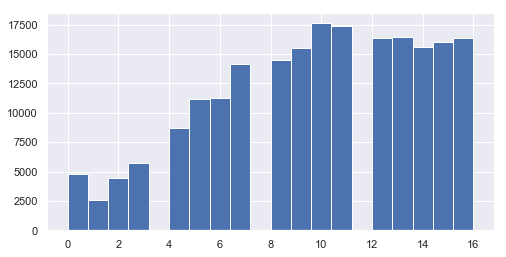

In [16]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,4))
df2['Age'].hist(bins=20)

### Create dummies

In [17]:
vehicleType = pd.get_dummies(df2['vehicleType'], drop_first=True)
gearbox = pd.get_dummies(df2['gearbox'], drop_first=True)
fuelType = pd.get_dummies(df2['fuelType'], drop_first=True)
notRepairedDamage = pd.get_dummies(df2['notRepairedDamage'], drop_first=True)
brandSegment = pd.get_dummies(df2['Brand segment'], drop_first=True)

In [18]:
df2.drop(['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'Brand segment', 'brand', 'yearOfRegistration'], axis=1, inplace=True)

In [19]:
df2 = pd.concat([df2, vehicleType, gearbox, fuelType, notRepairedDamage, brandSegment], axis=1)

In [20]:
df2.head(2)

,price,powerPS,kilometer,Age,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv,manuell,cng,diesel,elektro,hybrid,lpg,nein,mass market,premium
0,18300,190.0,125000,5,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1500,75.0,150000,15,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0


### Build a Linear Regression model

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print(lm.intercept_)

18328.981192037474


In [31]:
coeff_df2 = pd.DataFrame(lm.coef_,X.columns,columns=['coefficient'])
coeff_df2

,coefficient
powerPS,63.542790
kilometer,-0.057841
Age,-578.188508
bus,493.256702
cabrio,1773.845681
coupe,1179.340609
kleinwagen,289.617043
kombi,-828.643170
limousine,-463.281238
suv,782.728122


In [32]:
coeff_df2.sort_values(by = "coefficient")

,coefficient
mass market,-8963.933651
premium,-8395.744319
lpg,-1118.298778
kombi,-828.643170
manuell,-784.060878
elektro,-705.532339
Age,-578.188508
limousine,-463.281238
kilometer,-0.057841
powerPS,63.542790


In [29]:
#coeff_df2.to_excel('coefficients.xlsx')

In [33]:
pred = lm.predict(X_test)

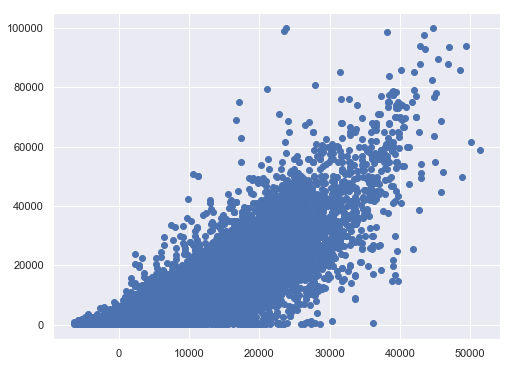

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
plt.scatter(pred,y_test)

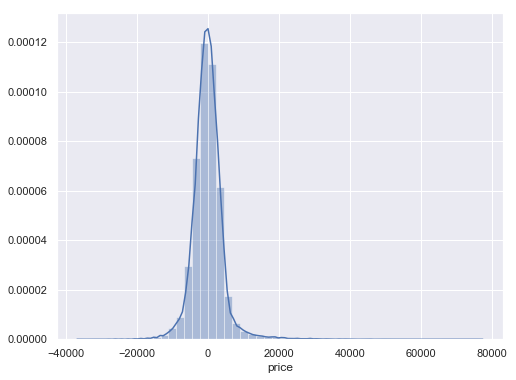

In [36]:
plt.figure(figsize=(8,6))
sns.distplot((y_test-pred),bins=50)
plt.show()

In [37]:
from sklearn import metrics

In [38]:
print('MAE', metrics.mean_absolute_error(y_test, pred))

MAE 2948.730604915365


In [39]:
print(metrics.r2_score(y_test, pred))

0.6999581764368441
